In [71]:
import pickle_util
import pandas as pd
import numpy as np

from sklearn.externals import joblib

from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift

import operator

%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [53]:
# config
# g_name = 'dev'
g_name = 'train'
g_name = 'full_clean'

In [54]:
# config
f_name = g_name
f_name_vocab = 'vocab_'+g_name
f_name_content = 'X_content_'+g_name
f_name_entities = 'X_entities_'+g_name
f_name_terms_content = 'terms_content_'+g_name
f_name_terms_entities = 'terms_entities_'+g_name
# load data
data = pickle_util.load_obj(f_name)
vocab = pickle_util.load_obj(f_name_vocab)
X_content = pickle_util.load_obj(f_name_content)
X_entities = pickle_util.load_obj(f_name_entities)
terms_content = pickle_util.load_obj(f_name_terms_content)
terms_entities = pickle_util.load_obj(f_name_terms_entities)

In [55]:
def kmeans_cluster(X, g_name, num_clusters=100, cust_str=''):
    try:
        model = joblib.load('../models/kmeans_'+g_name+'_'+cust_str+'.pkl')
    except:
        model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
        model.fit(X)
#         clusters = model.labels_.tolist()
        joblib.dump(model, '../models/kmeans_'+g_name+'_'+cust_str+'.pkl')
    return model

In [56]:
def print_cluster_terms(model, terms):
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(model.n_clusters):
        print "Cluster %d:" % i
        for ind in order_centroids[i, :15]:
            print ' %s' % terms[ind], 
        print

In [57]:
def plot_cluster_counts(model):
    label_counts = {}
    for label in model.labels_:
        try:
            label_counts[label] +=1
        except:
            label_counts[label] = 0

    print label_counts
    print type(label_counts.keys()), " ", type(label_counts.values())

    plt.bar(label_counts.keys(), label_counts.values())

In [79]:
model_entities.labels_.tolist()
label_counts = {}
for label in model_entities.labels_:
    try:
        label_counts[label] +=1
    except:
        label_counts[label] = 0

sorted_label_counts = sorted(label_counts.items(), key=operator.itemgetter(1))
junk_cluster_label =  sorted_label_counts[::-1][0]
x

(0, 5752)


In [ ]:
def remove_junk(X, model):
    

In [58]:
def reduce_and_plot_clusters(X, model):
    X_reduced = TruncatedSVD().fit_transform(X)
    X_embedded = TSNE(learning_rate=100).fit_transform(X_reduced)
    # X_pca = PCA().fit_transform(content_mat)
    # Creating a discrete colorbar
#     colors = np.linspace(0, 1, model.n_clusters)
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x", c=model.labels_.tolist(), cmap=cm.jet)

## Content

In [59]:
print X_content.shape
print len(terms_content)

(8253, 68)
68


In [80]:
model_content = kmeans_cluster(X_content, g_name, num_clusters=20, cust_str='cont_10')

In [81]:
print_cluster_terms(model_content, terms_content)

Top terms per cluster:
Cluster 0:
 busi  's  provid  compani  manag  servic  develop  market  work  inform  custom  includ  technolog  http  help
Cluster 1:
 report  's  year  said  compani  new  share  state  origin  use  releas  includ  busi  offic  time
Cluster 2:
 state  http  use  ani  make  time  septemb  help  inform  's  work  need  includ  support  offer
Cluster 3:
 pr newswir  pr  newswir  http  visit  's  newswir visit http  newswir visit  visit http  pr newswir visit  origin version pr  view origin version  version pr newswir  version pr  view origin
Cluster 4:
 world  offer  inform  's  time  compani  support  includ  septemb  said  http  new  state  ani  make
Cluster 5:
 industri  's  state  market  oper  million  provid  product  new  work  report  compani  visit  world  global
Cluster 6:
 share  compani  report  's  market  septemb  busi  right  announc  million  year  inc.  time  follow  provid
Cluster 7:
 said  's  state  report  year  offic  time  work  ani  new  use

{0: 2681, 1: 594, 2: 1348, 3: 2075, 4: 1550}
<type 'list'>   <type 'list'>


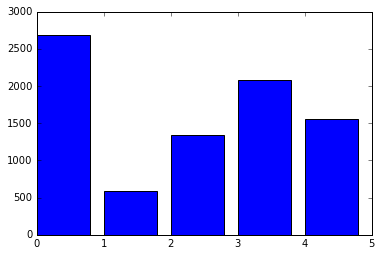

In [62]:
plot_cluster_counts(model_content)

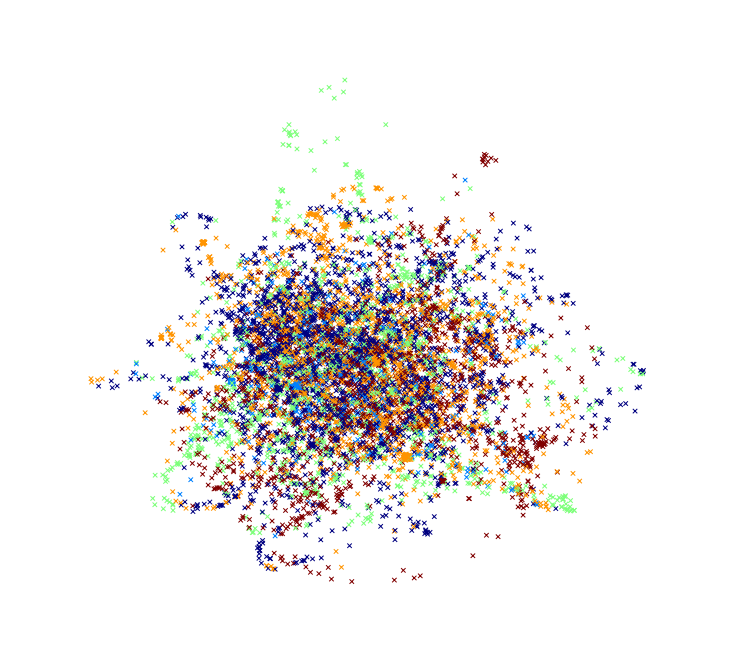

In [63]:
reduce_and_plot_clusters(X_content, model_content)

## Entities

In [64]:
model_entities = kmeans_cluster(X_entities, g_name, num_clusters=10, cust_str='ent_10')

In [65]:
print_cluster_terms(model_entities, terms_entities)

Top terms per cluster:
Cluster 0:
 china  pr  newswire  pr newswire  united  india  nyse  reuters  american  europe  canada  nasdaq  president  bank  the
Cluster 1:
 oil  financial  energy  dividend  exchange  tsx  insurance  shareholders  shares  stock  chief  officer  venture exchange  tsx venture  venture
Cluster 2:
 pr newswire  pr  newswire  allstate  newswire pr  york pr  new york  york  new  allstate allstate  collision frequency  collision  kansas  frequency  precipitation
Cluster 3:
 beer  beer beer  beer wholesalers  wholesalers association  national beer  wholesalers  labor  association  national  labor day  alcohol  day  tax  business  business capital
Cluster 4:
 securities  marketing  president  vice president  vice  act  officer  chief  pr  pr newswire  newswire  securities securities  private  gbp  ceo
Cluster 5:
 cloud  software  mobile  apple  it  google  data  salesforce  android  analytics  management  newswire  pr newswire  pr  healthcare
Cluster 6:
 new  york  new

{0: 5752, 1: 515, 2: 143, 3: 65, 4: 360, 5: 735, 6: 504, 7: 44, 8: 71, 9: 54}
<type 'list'>   <type 'list'>


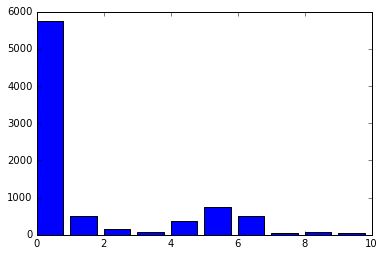

In [66]:
plot_cluster_counts(model_entities)

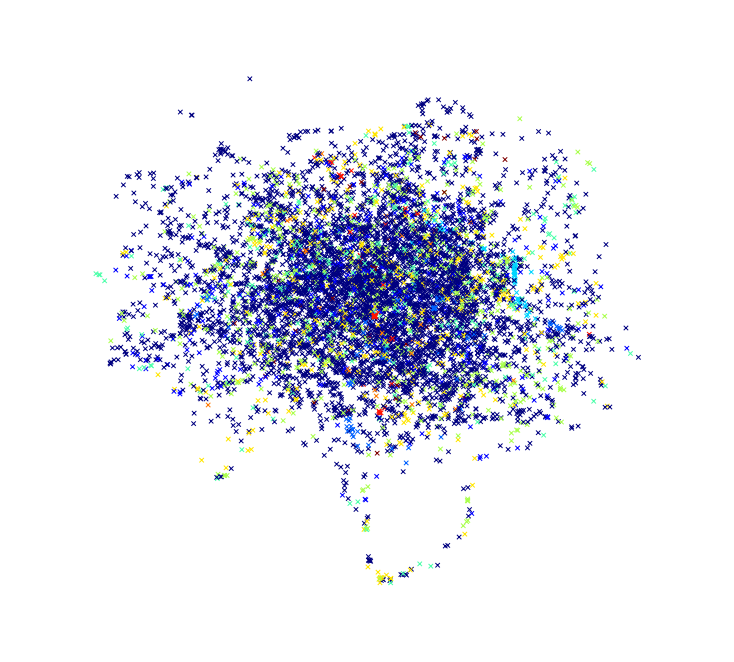

In [67]:
reduce_and_plot_clusters(X_entities, model_entities)

In [45]:
db_model_entities = DBSCAN(metric='cosine',  algorithm='brute', eps=0.9)
db_model_entities.fit(X_entities)

DBSCAN(algorithm='brute', eps=0.9, leaf_size=30, metric='cosine',
    min_samples=5, p=None, random_state=None)

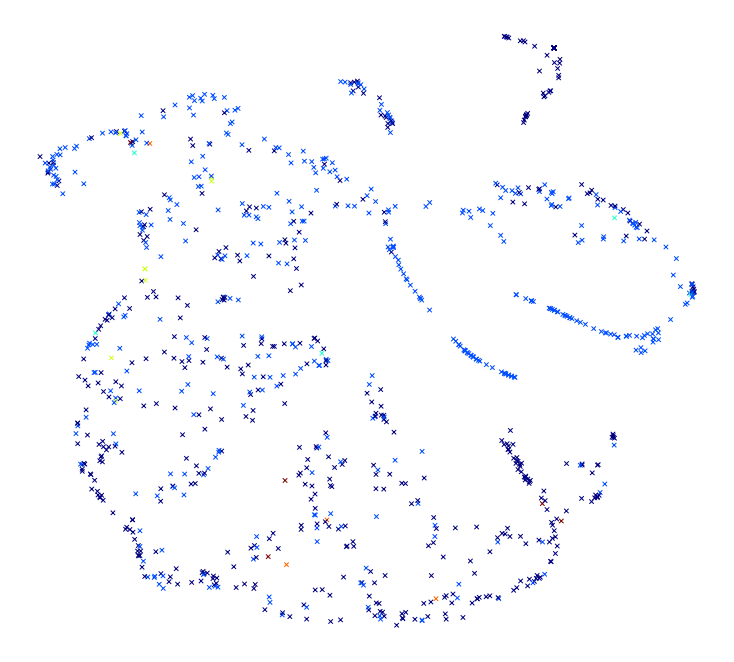

In [46]:
reduce_and_plot_clusters(X_entities, db_model_entities)

In [47]:
spectral_entities = SpectralClustering(affinity='nearest_neighbors', n_clusters=5)
spectral_entities.fit(X_entities)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_neighbors=10,
          random_state=None)

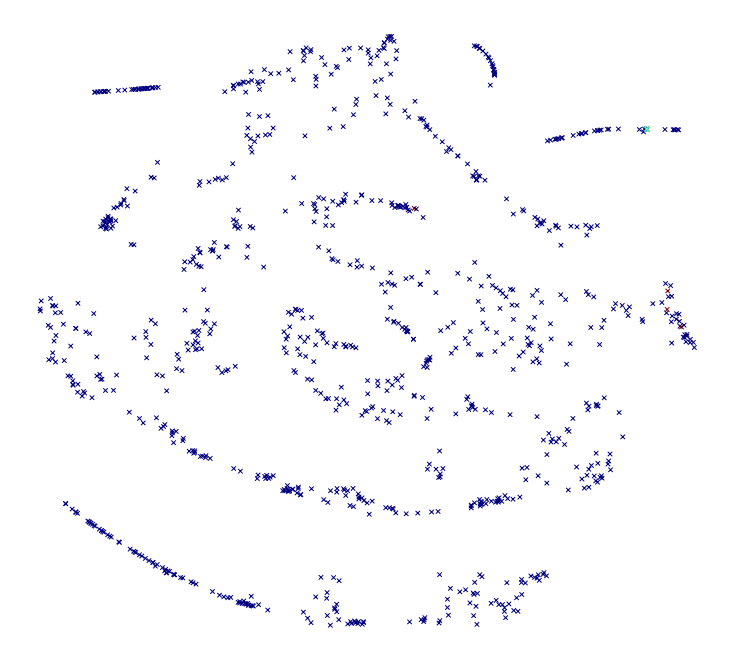

In [49]:
reduce_and_plot_clusters(X_entities, spectral_entities)

In [50]:
meanshift_entities = MeanShift()
meanshift_entities.fit(X_entities.toarray())
meanshift_labels = meanshift_entities.labels_
meanshift_cluster_centers = meanshift_entities.cluster_centers_

TypeError: reduce_and_plot_clusters() takes exactly 2 arguments (3 given)